R² Score: 0.9889832909573145
Mean Squared Error: 4.082628398521853
                                  Coefficient
Hours Studied                        2.852484
Previous Scores                      1.016988
Extracurricular Activities           0.608617
Sleep Hours                          0.476941
Sample Question Papers Practiced     0.191831
Intercept: -33.92194621555638


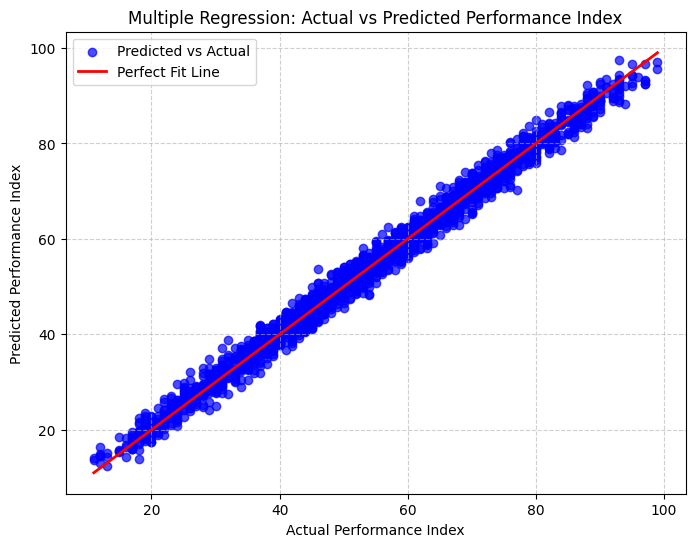

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("Student_Performance.csv")

# Clean column names (remove extra spaces if any)
df.columns = df.columns.str.strip()

# Convert categorical 'Extracurricular Activities' to numeric
df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes':1, 'No':0})

# Define features (X) and target (y)
X = df[['Hours Studied','Previous Scores','Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced']]
y = df['Performance Index']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Show coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Intercept
print("Intercept:", model.intercept_)

# ---- Plot Actual vs Predicted ----
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.7, label="Predicted vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color="red", linewidth=2, label="Perfect Fit Line")
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Multiple Regression: Actual vs Predicted Performance Index")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
